# Comparison of stepped and automatic insertions, BNP 4/13/21

At two of the transect "flags" in Transect 1 at BNP (4/13/21), we took two automatic insertions, and one stepped insertion.  At each flag, the three insertions were located within inches of each other.  In this notebook, the spectra acquired with the stepped insertion are plotted, together with the spectra from the automatic insertions at a similar depth.

We took two spectra at each depth acquired in a stepped insertion.  Spectra are acquired at irregular depths in an automatic insertion.

In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from scipy.signal import savgol_filter
plt.style.use('seaborn')

In [2]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"

In [3]:
BNP_transects = "210413_BNP_transect/BNP_data_collection_210413.h5"

In [4]:
file = path_name + BNP_transects

In [5]:
def get_absorbance_depth(file_string, insertion_string):
    with h5py.File(file_string, 'r') as h5_file:
        abs_depth = h5_file[f'{insertion_string}/derived/absorbance_depth'][:]
        return abs_depth

In [6]:
ins001_df = pd.DataFrame(get_absorbance_depth(file, 'session001/cal001/ins001'))

ins002_df = pd.DataFrame(get_absorbance_depth(file, 'session001/cal001/ins002'))

ins003_df = pd.DataFrame(get_absorbance_depth(file, 'session001/cal001/ins003'))

ins010_df = pd.DataFrame(get_absorbance_depth(file, 'session001/cal001/ins010'))

ins011_df = pd.DataFrame(get_absorbance_depth(file, 'session001/cal001/ins011'))

ins012_df = pd.DataFrame(get_absorbance_depth(file, 'session001/cal001/ins012'))

In [7]:
with h5py.File(file, 'r') as h5_file:
    vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

In [8]:
flag1_depths = round(ins003_df.loc[:, 1213], 1).unique()

# Flag 1, Visible light spectrometer

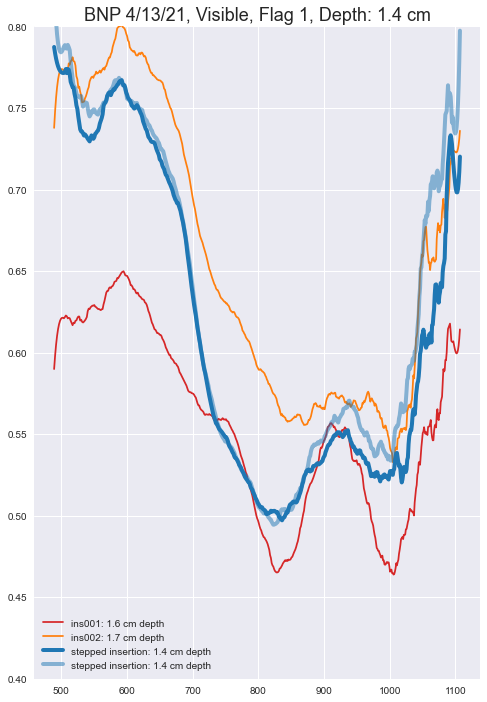

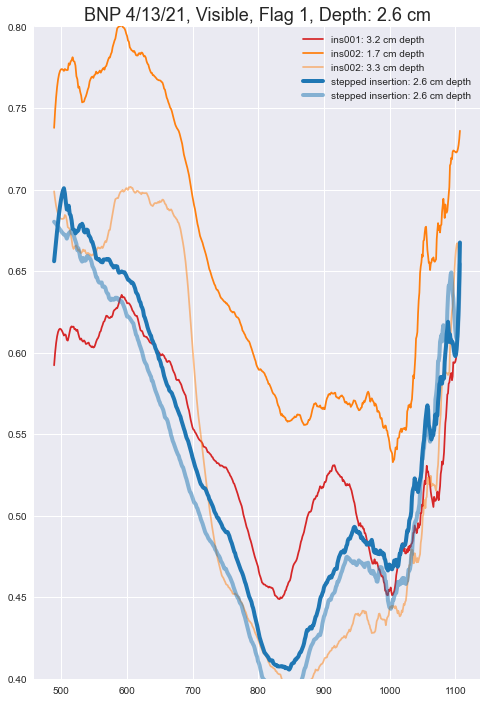

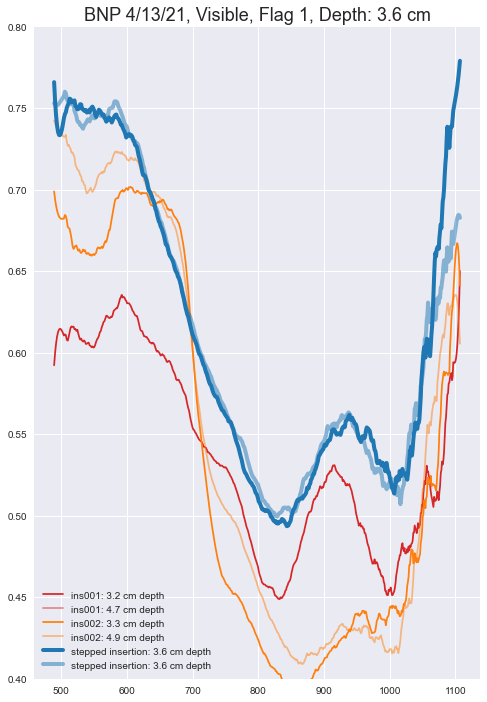

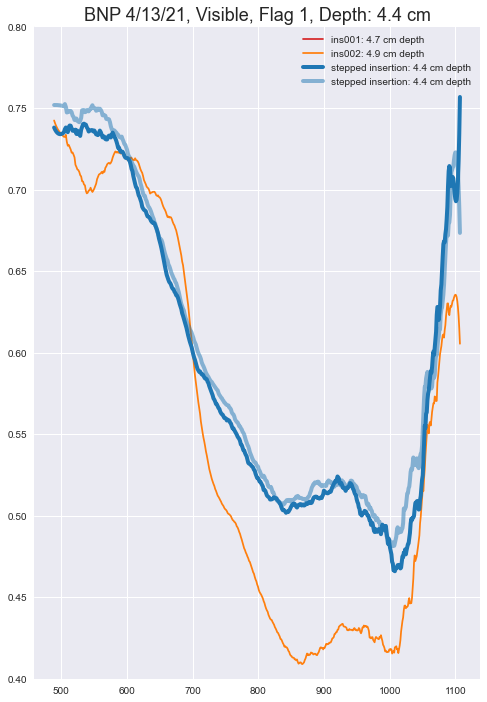

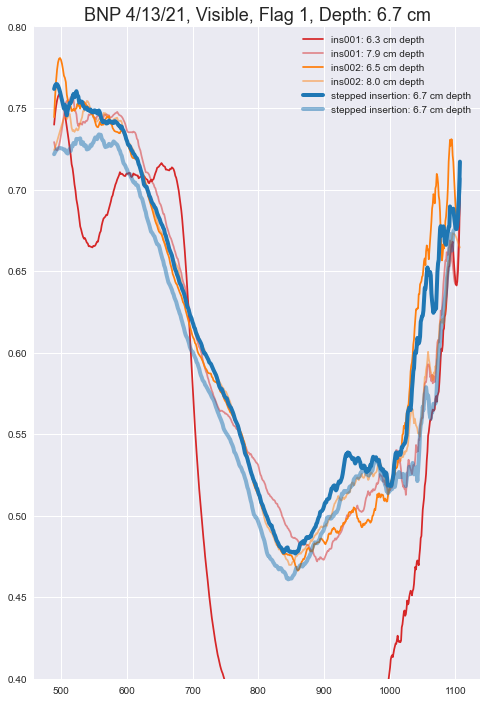

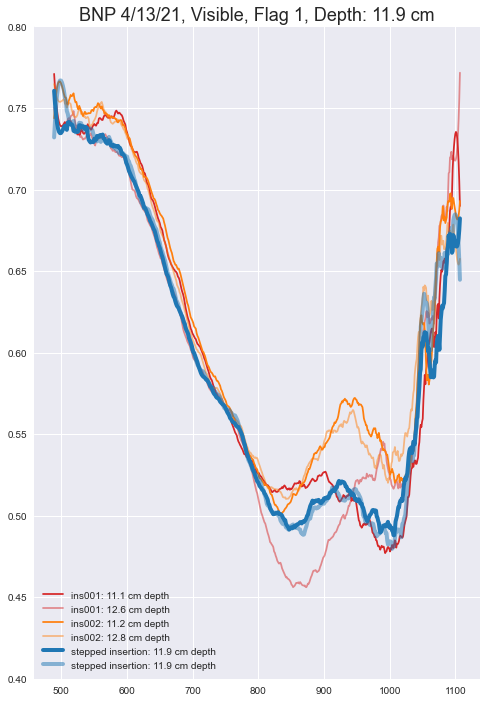

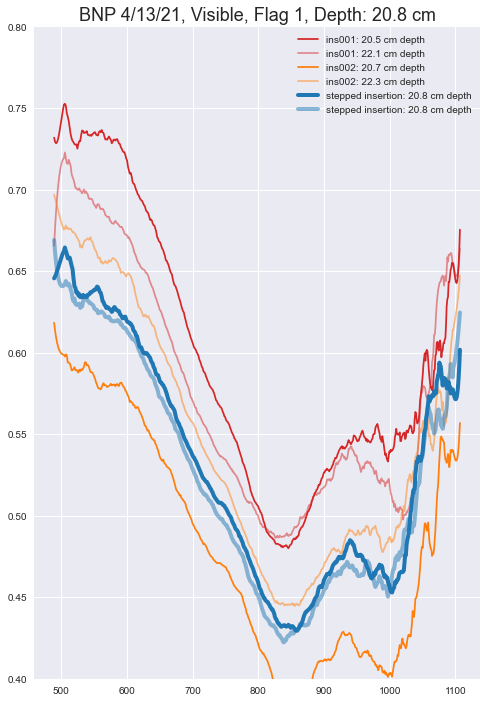

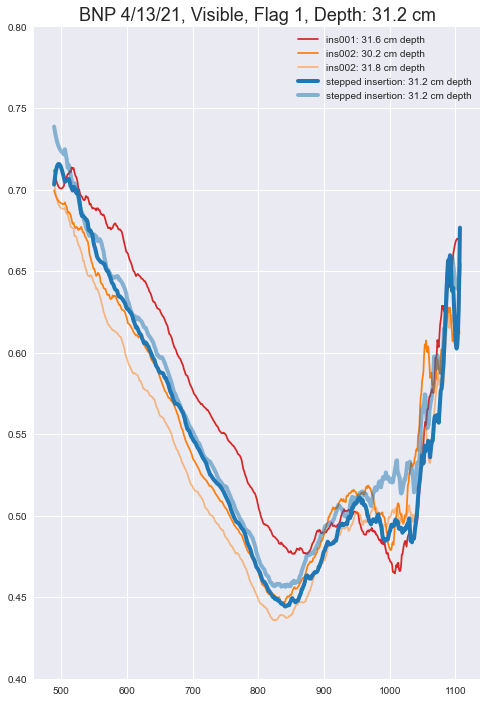

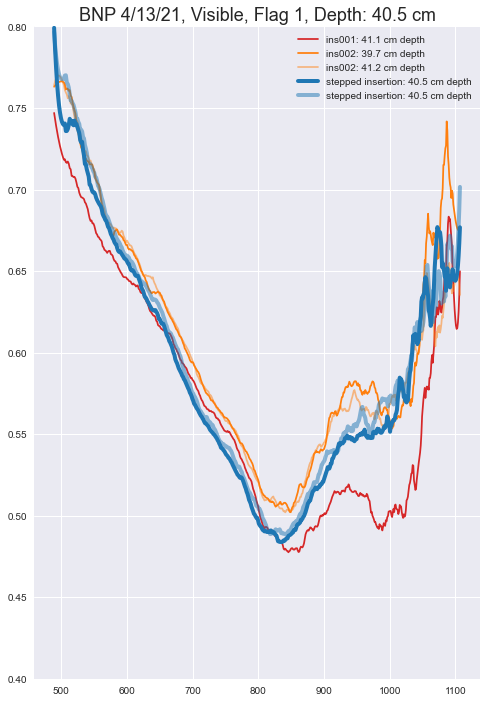

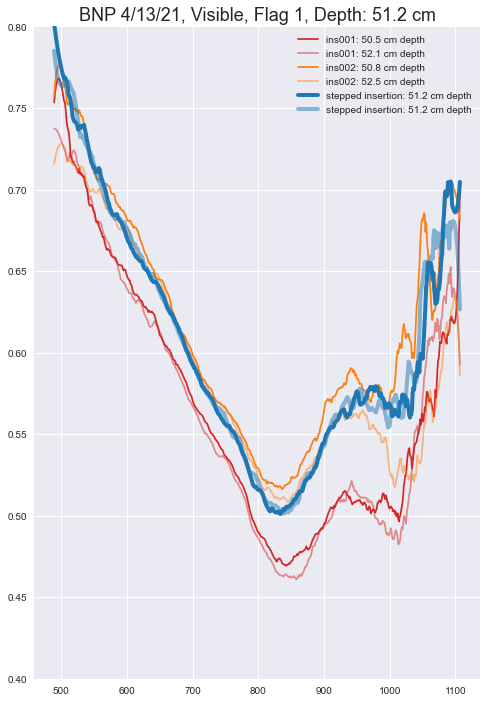

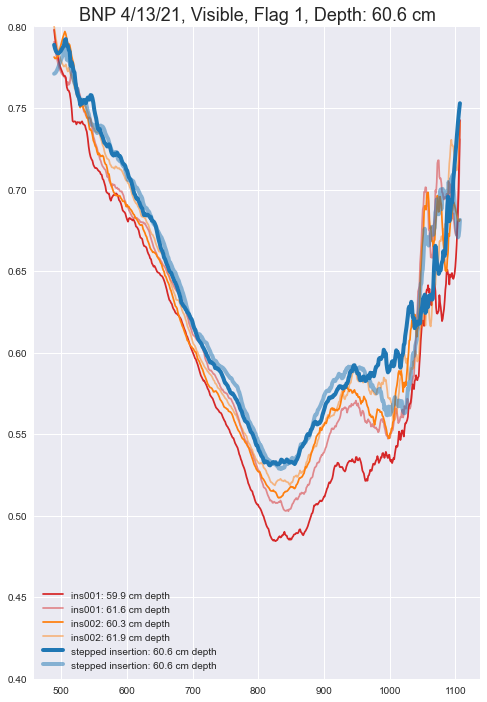

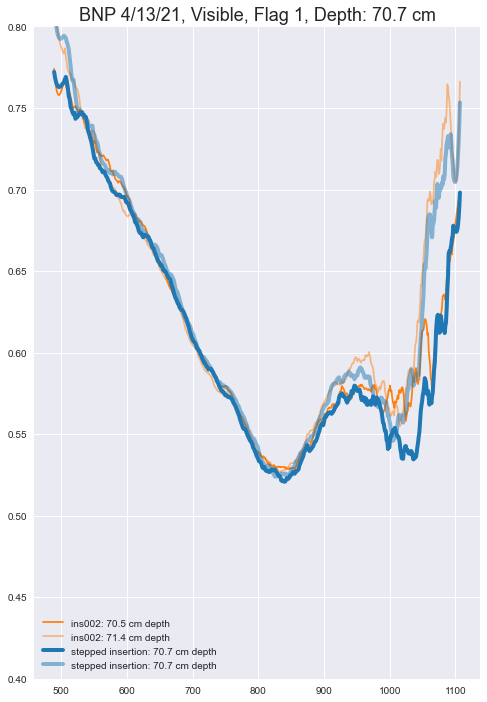

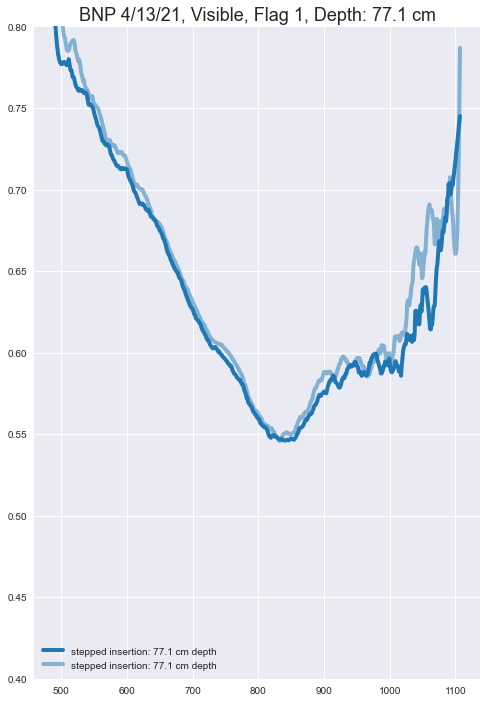

In [9]:
for depth in flag1_depths:
    moving = ins001_df.loc[(ins001_df[1213] > (depth - 1)) & (ins001_df[1213] <= (depth + 1.5))].copy()
    moving2 = ins002_df.loc[(ins002_df[1213] > (depth - 1)) & (ins002_df[1213] <= (depth + 1.5))].copy()
    stationary = ins003_df.loc[round(ins003_df[1213], 1) == depth].copy()
    vis_moving = moving.iloc[:, :512]
    vis_moving2 = moving2.iloc[:, :512]
    vis_stationary = stationary.iloc[:, :512]
    fig, ax = plt.subplots(figsize=(8, 12))
    ax.set_title(f"BNP 4/13/21, Visible, Flag 1, Depth: {depth} cm", fontsize=18)
    ax.set_ylim(0.4, 0.8)    
    count = vis_moving.shape[0]
    for i in range(count):        
        moving_depth = moving.iat[i, -1]
        label = f'ins001: {moving_depth:0.1f} cm depth'        
        alpha = 1 - (i/count)
        ax.plot(vis_waves, savgol_filter(vis_moving.iloc[i, :], 21, 3), 'tab:red', alpha=alpha, label=label) 
                
    count = vis_moving2.shape[0]
    for i in range(count):
        moving_depth = moving2.iat[i, -1]
        label = f'ins002: {moving_depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(vis_waves, savgol_filter(vis_moving2.iloc[i, :], 21, 3), 'tab:orange', alpha=alpha, label=label)
        
    count = vis_stationary.shape[0]
    for i in range(count):
        label = f'stepped insertion: {depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(vis_waves, savgol_filter(vis_stationary.iloc[i, :], 21, 3), 'tab:blue', lw=4,alpha=alpha, label=label)
    leg = ax.legend()
    plt.show()
    plt.close()
    

# Flag 1, FTIR engine spectrometer

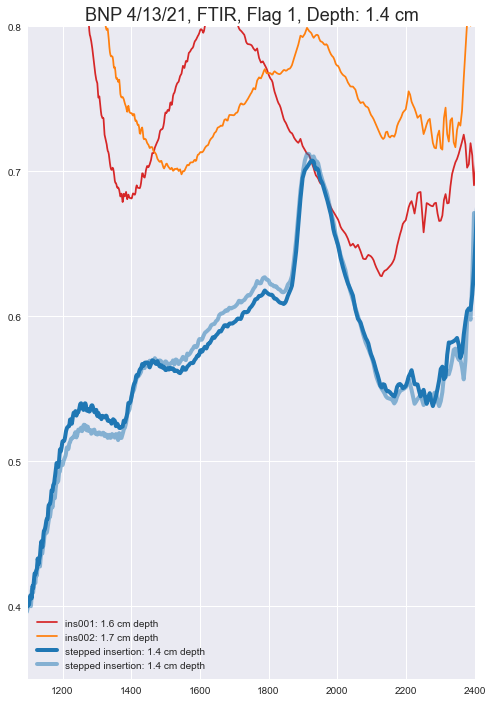

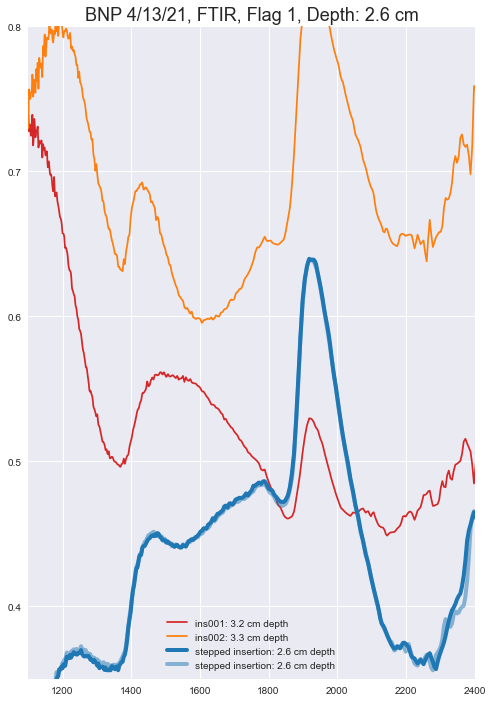

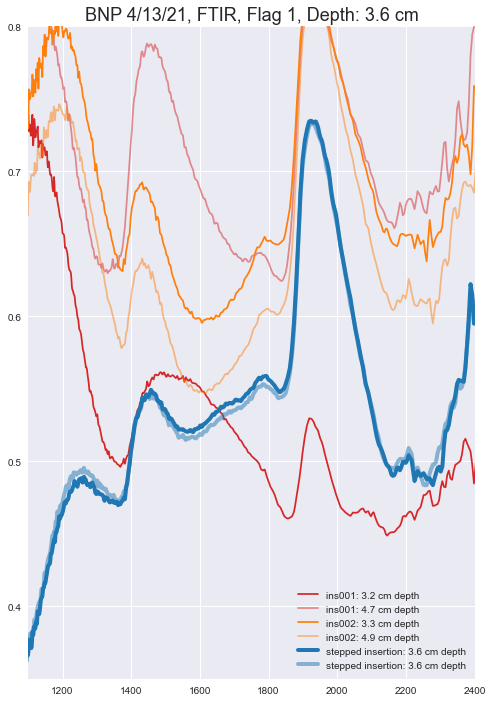

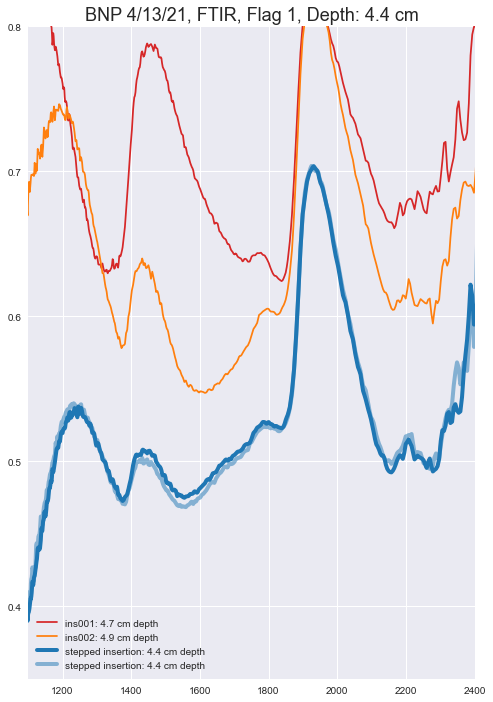

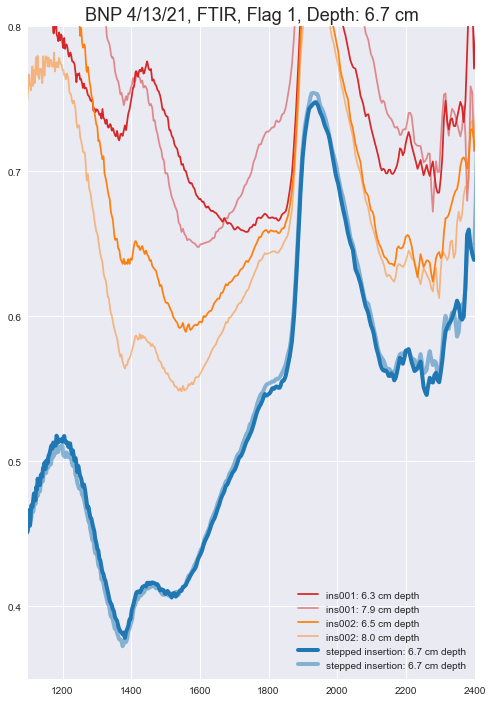

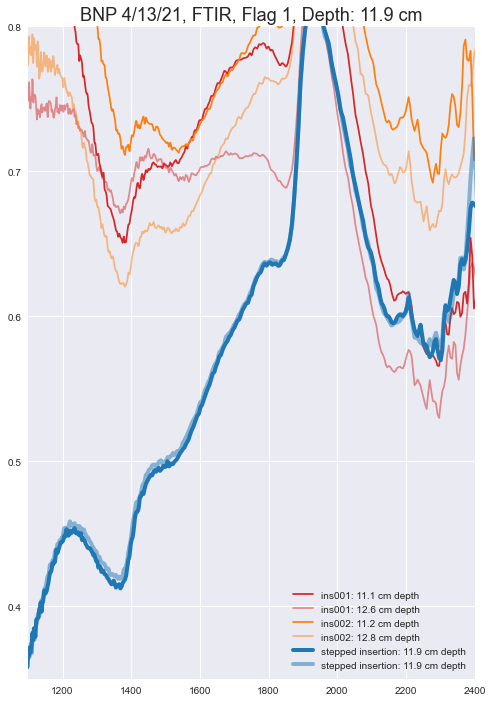

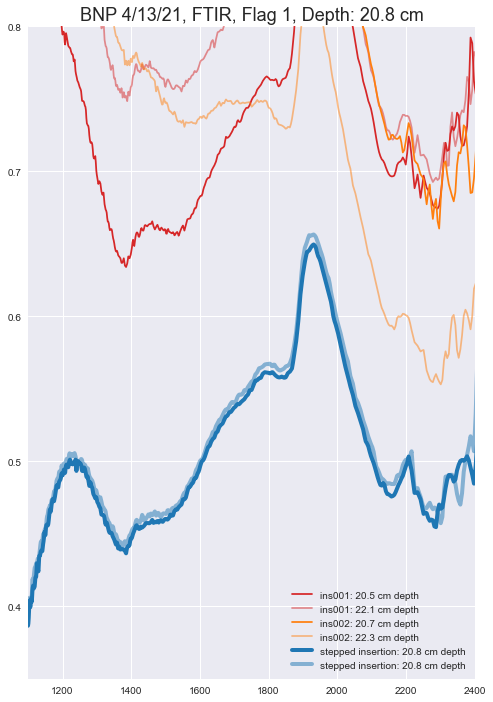

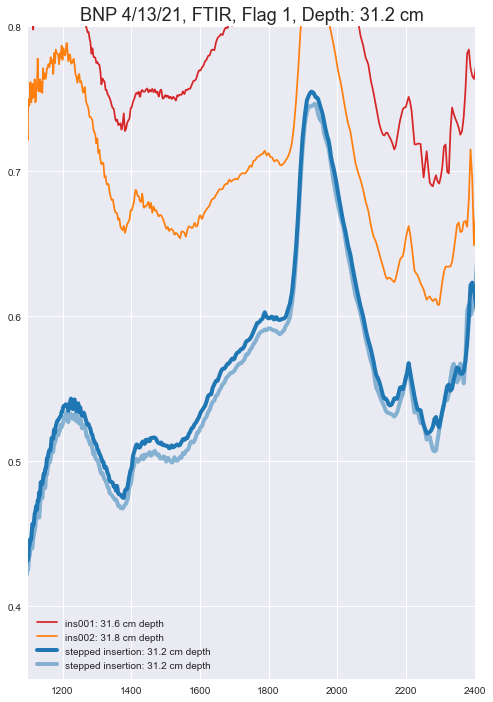

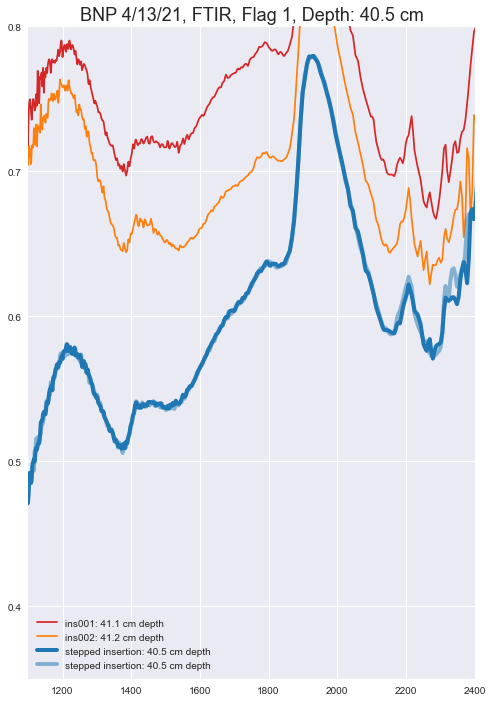

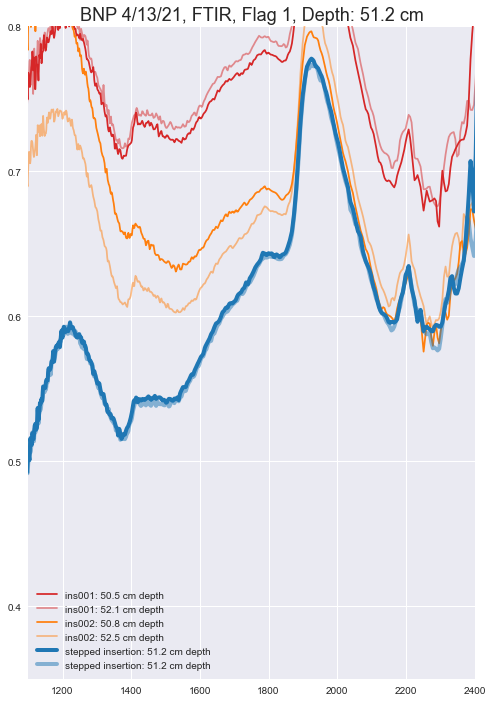

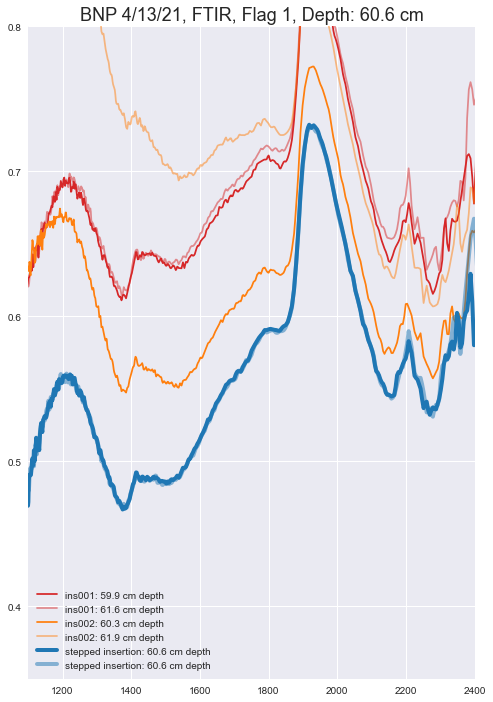

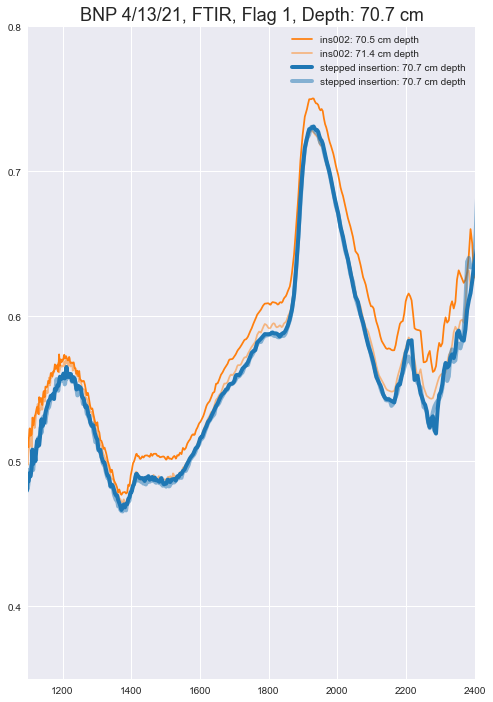

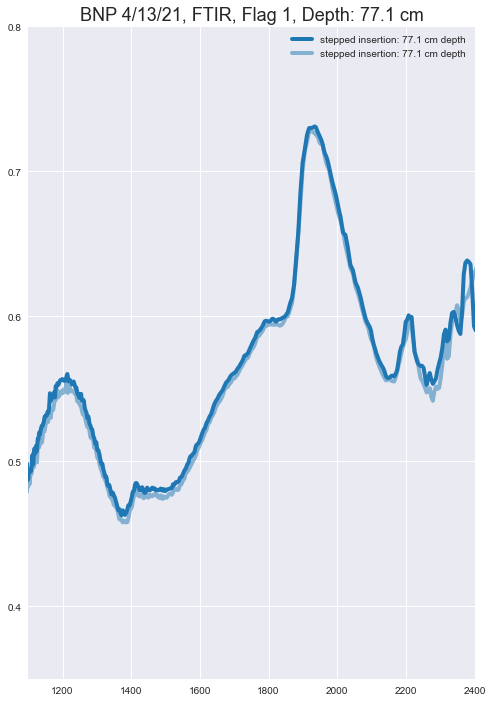

In [10]:
for depth in flag1_depths:
    moving = ins001_df.loc[(ins001_df[1213] > (depth - 0.8)) & (ins001_df[1213] <= (depth + 1.5))].copy()
    moving2 = ins002_df.loc[(ins002_df[1213] > (depth - 0.8)) & (ins002_df[1213] <= (depth + 1.5))].copy()
    stationary = ins003_df.loc[round(ins003_df[1213], 1) == depth].copy()   
    ftir_moving = moving.iloc[:, 512:-2]
    ftir_moving2 = moving2.iloc[:, 512:-2]
    ftir_stationary = stationary.iloc[:, 512:-2]
    fig, ax = plt.subplots(figsize=(8, 12))
    ax.set_title(f"BNP 4/13/21, FTIR, Flag 1, Depth: {depth} cm", fontsize=18)
    ax.set_ylim(0.35, 0.8)
    ax.set_xlim(1100, 2400)
    count = ftir_moving.shape[0]
    for i in range(count):
        moving_depth = moving.iat[i, -1]
        label = f'ins001: {moving_depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(ftir_waves, ftir_moving.iloc[i, :], 'tab:red', alpha=alpha, label=label)
    count = ftir_moving2.shape[0]
    for i in range(count):
        moving_depth = moving2.iat[i, -1]
        label = f'ins002: {moving_depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(ftir_waves, ftir_moving2.iloc[i, :], 'tab:orange', alpha=alpha, label=label)
    count = ftir_stationary.shape[0]
    for i in range(count):
        label = f'stepped insertion: {depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(ftir_waves, ftir_stationary.iloc[i, :], 'tab:blue', lw=4, alpha=alpha, label=label)
    leg = ax.legend()
    plt.show()
    plt.close()


In [11]:
flag5_depths = round(ins012_df.loc[:, 1213], 1).unique()

# Flag 5: Visible light spectrometer

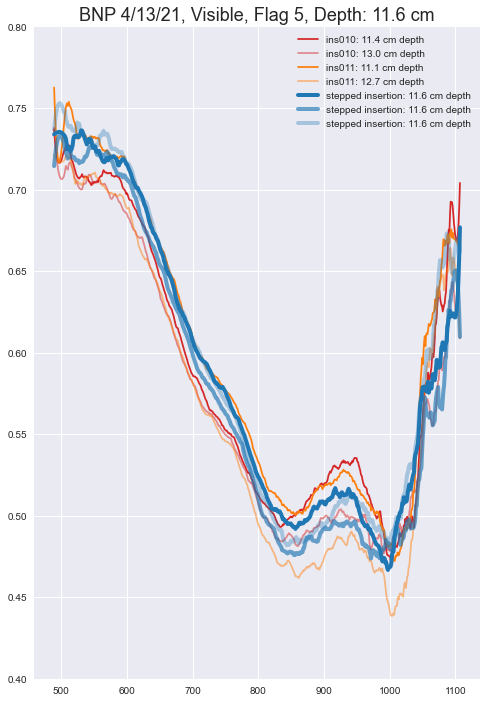

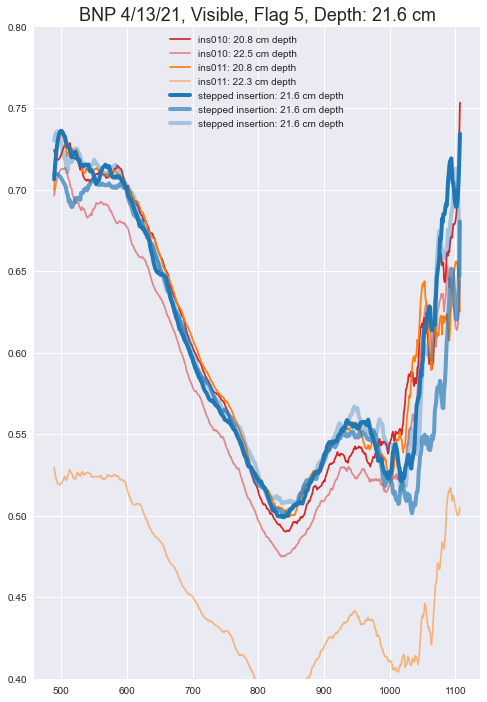

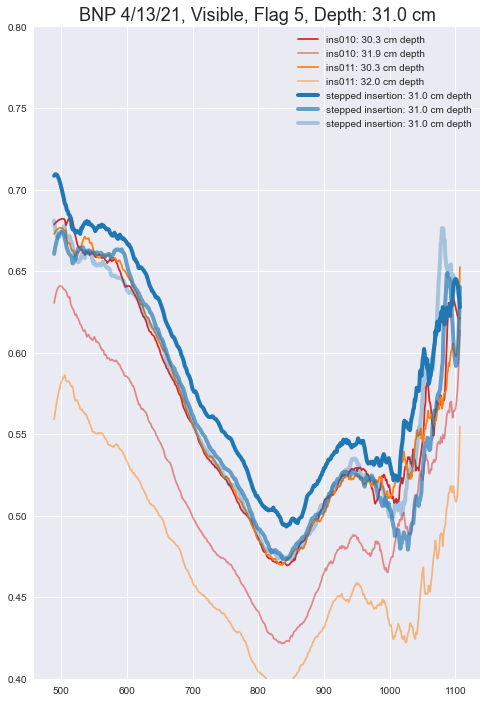

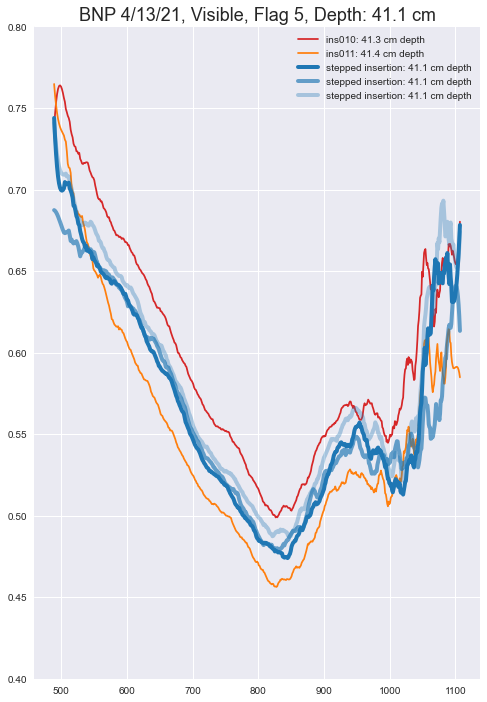

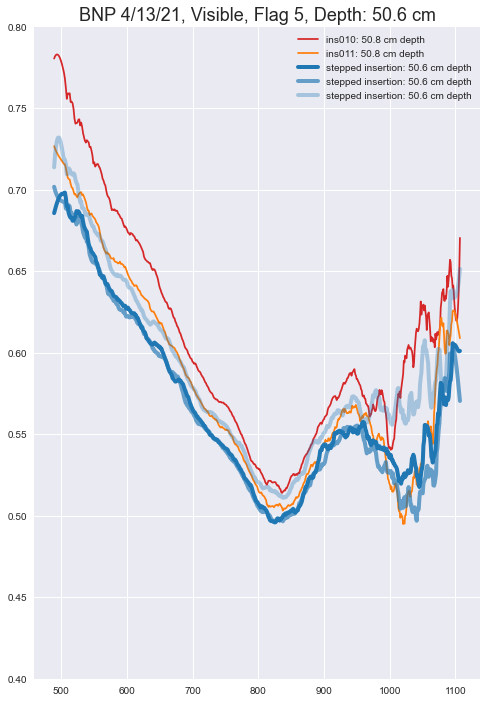

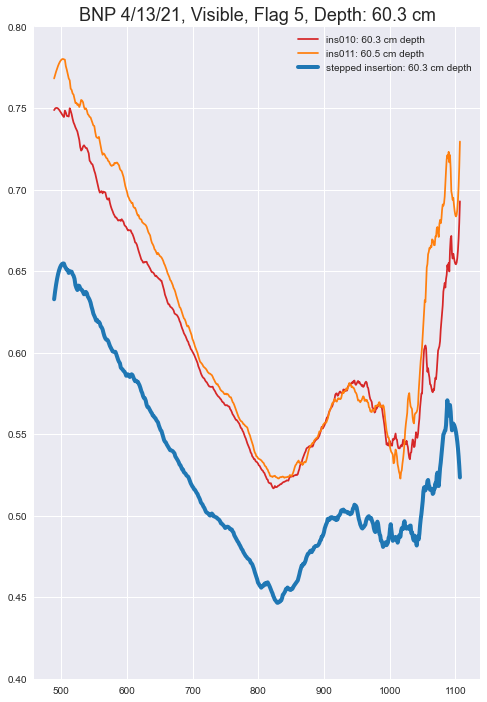

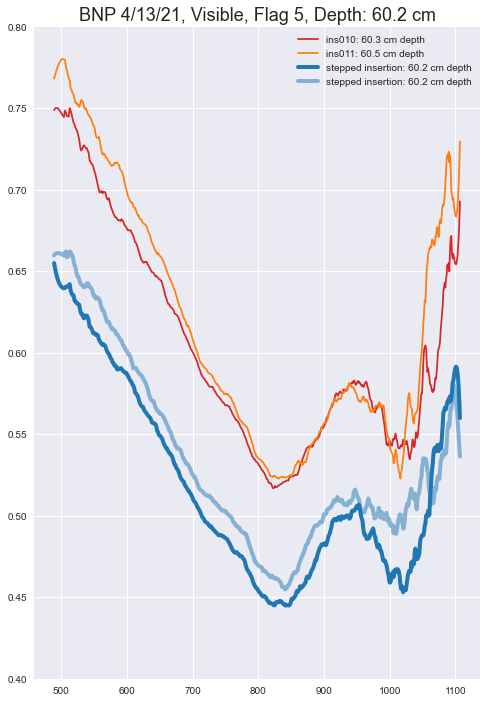

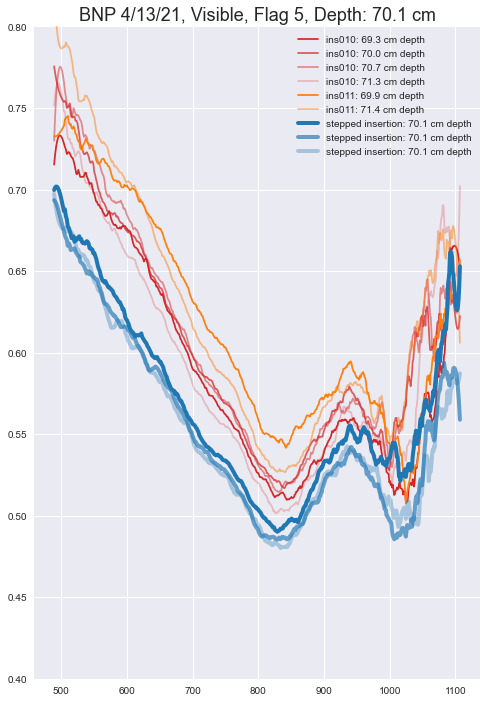

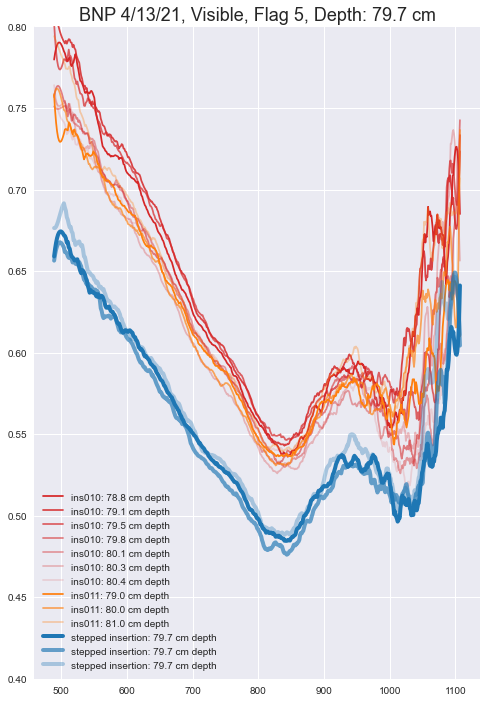

In [12]:
for depth in flag5_depths:
    moving = ins010_df.loc[(ins010_df[1213] > (depth - 1)) & (ins010_df[1213] <= (depth + 1.5))].copy()
    moving2 = ins011_df.loc[(ins011_df[1213] > (depth - 1)) & (ins011_df[1213] <= (depth + 1.5))].copy()
    stationary = ins012_df.loc[round(ins012_df[1213], 1) == depth].copy()
    vis_moving = moving.iloc[:, :512]
    vis_moving2 = moving2.iloc[:, :512]
    vis_stationary = stationary.iloc[:, :512]
    fig, ax = plt.subplots(figsize=(8, 12))
    ax.set_title(f"BNP 4/13/21, Visible, Flag 5, Depth: {depth} cm", fontsize=18)
    ax.set_ylim(0.4, 0.8)    
    count = vis_moving.shape[0]
    for i in range(count):        
        moving_depth = moving.iat[i, -1]
        label = f'ins010: {moving_depth:0.1f} cm depth'
        color = plt.cm.Reds(i-0.4/(count+0.4))
        alpha = 1 - (i/count)
        ax.plot(vis_waves, savgol_filter(vis_moving.iloc[i, :], 21, 3), 'tab:red', alpha=alpha, label=label) 
                
    count = vis_moving2.shape[0]
    for i in range(count):
        moving_depth = moving2.iat[i, -1]
        label = f'ins011: {moving_depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(vis_waves, savgol_filter(vis_moving2.iloc[i, :], 21, 3), 'tab:orange', alpha=alpha, label=label)
        
    count = vis_stationary.shape[0]
    for i in range(count):
        label = f'stepped insertion: {depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(vis_waves, savgol_filter(vis_stationary.iloc[i, :], 21, 3), 'tab:blue', lw=4,alpha=alpha, label=label)
    leg = ax.legend()
    plt.show()
    plt.close()

# Flag 5: FTIR engine spectrometer

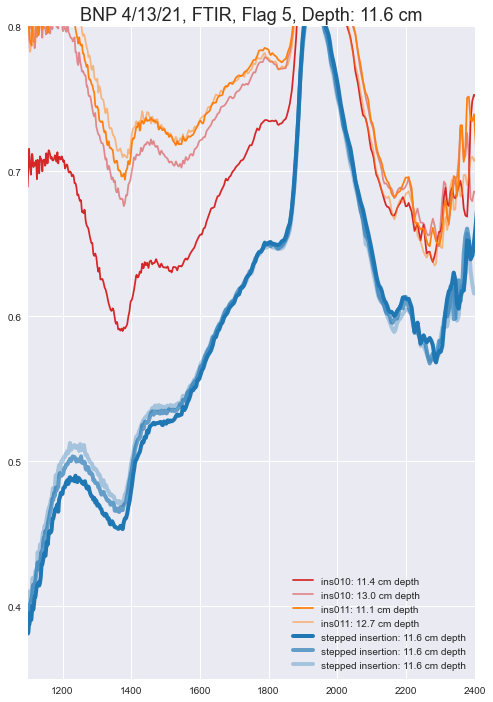

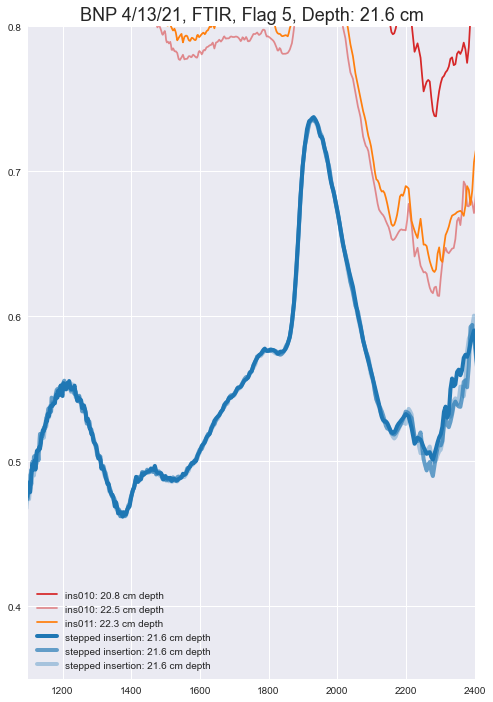

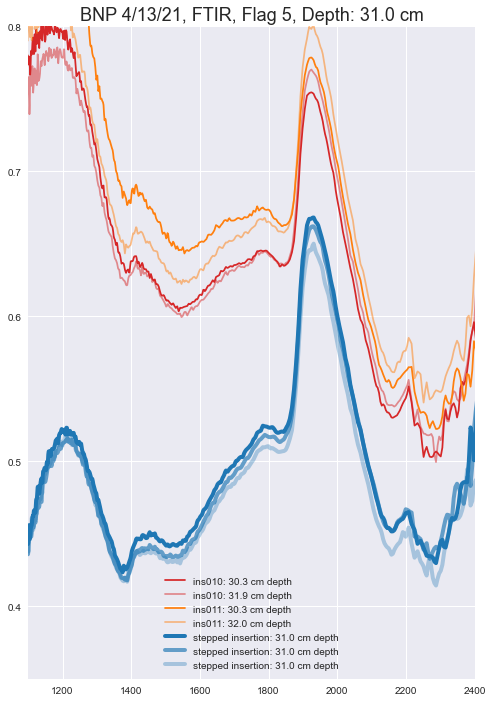

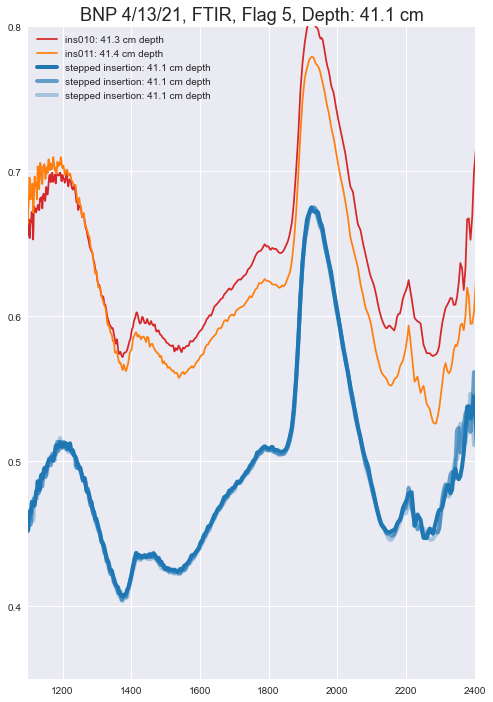

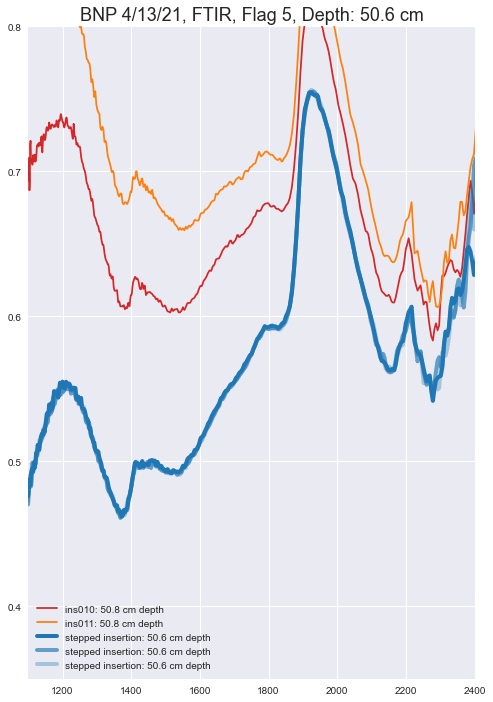

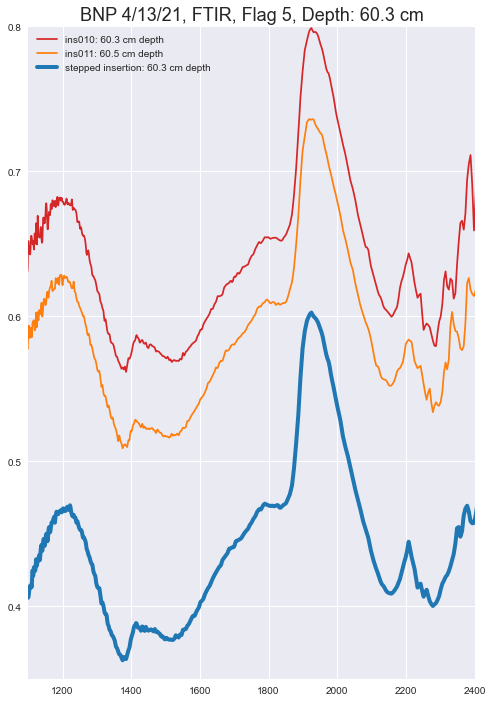

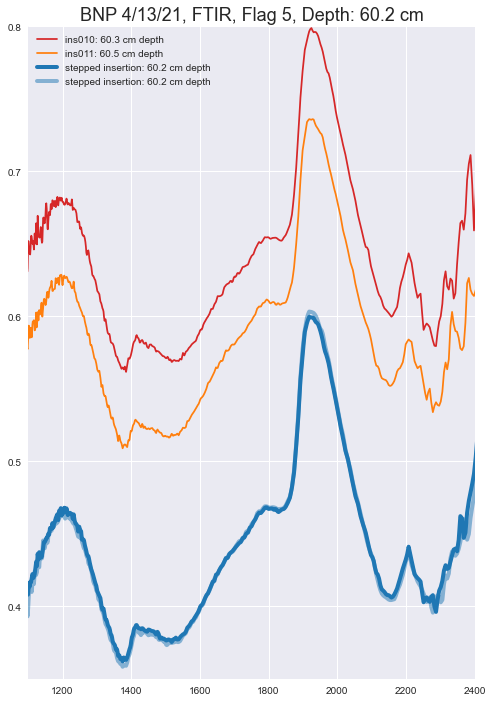

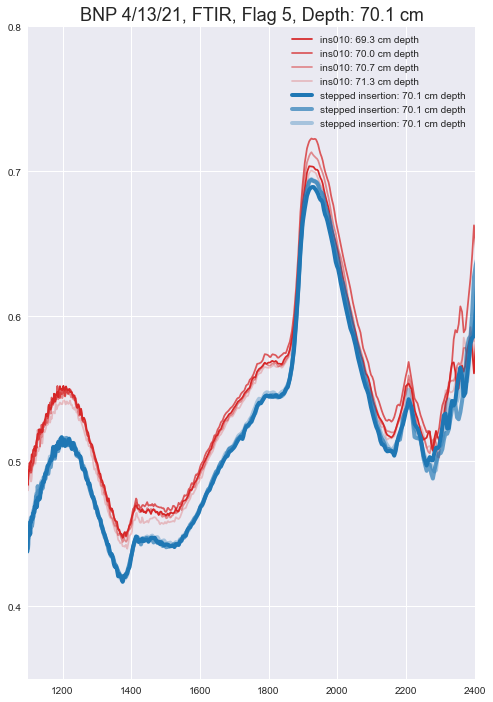

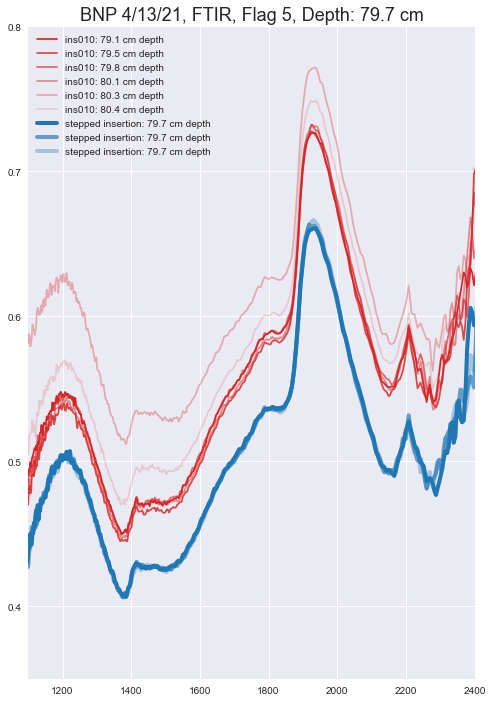

In [13]:
for depth in flag5_depths:
    moving = ins010_df.loc[(ins010_df[1213] > (depth - 0.8)) & (ins010_df[1213] <= (depth + 1.5))].copy()
    moving2 = ins011_df.loc[(ins002_df[1213] > (depth - 0.8)) & (ins011_df[1213] <= (depth + 1.5))].copy()
    stationary = ins012_df.loc[round(ins012_df[1213], 1) == depth].copy()   
    ftir_moving = moving.iloc[:, 512:-2]
    ftir_moving2 = moving2.iloc[:, 512:-2]
    ftir_stationary = stationary.iloc[:, 512:-2]
    fig, ax = plt.subplots(figsize=(8, 12))
    ax.set_title(f"BNP 4/13/21, FTIR, Flag 5, Depth: {depth} cm", fontsize=18)
    ax.set_ylim(0.35, 0.8)
    ax.set_xlim(1100, 2400)
    count = ftir_moving.shape[0]
    for i in range(count):
        moving_depth = moving.iat[i, -1]
        label = f'ins010: {moving_depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(ftir_waves, ftir_moving.iloc[i, :], 'tab:red', alpha=alpha, label=label)
    count = ftir_moving2.shape[0]
    for i in range(count):
        moving_depth = moving2.iat[i, -1]
        label = f'ins011: {moving_depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(ftir_waves, ftir_moving2.iloc[i, :], 'tab:orange', alpha=alpha, label=label)
    count = ftir_stationary.shape[0]
    for i in range(count):
        label = f'stepped insertion: {depth:0.1f} cm depth'
        alpha = 1 - (i/count)
        ax.plot(ftir_waves, ftir_stationary.iloc[i, :], 'tab:blue', lw=4, alpha=alpha, label=label)
    leg = ax.legend()
    plt.show()
    plt.close()


In [14]:
with h5py.File(file, 'r') as h5_file:
    vis_cal = h5_file['session001/cal001'].attrs['white_spectrum'][:]
    vis_cal2 = h5_file['session002/cal001'].attrs['white_spectrum'][:]
    ftir_cal = h5_file['session001/cal001'].attrs['white_spectrum2'][:]
    ftir_cal2 = h5_file['session002/cal001'].attrs['white_spectrum2'][:]
print(vis_cal[0])
print(ftir_cal[0])

10026.75
0.0060754633037453844


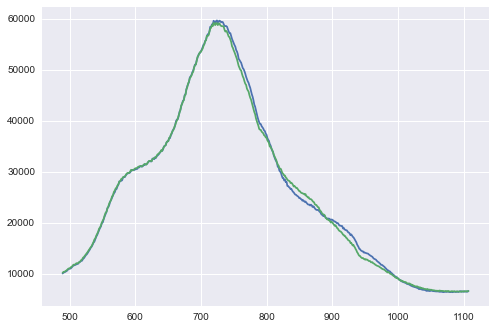

In [15]:
plt.plot(vis_waves, vis_cal)
plt.plot(vis_waves, vis_cal2);

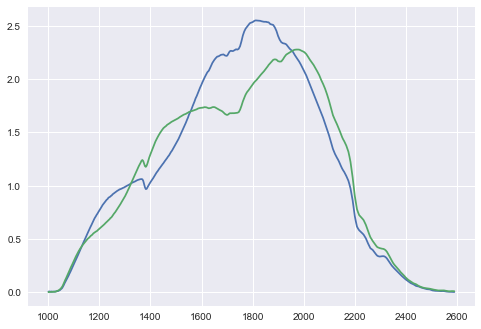

In [16]:
plt.plot(ftir_waves, ftir_cal)
plt.plot(ftir_waves, ftir_cal2);

In [17]:
def create_list_of_items_in_node(item_type, h5_file, node):
    keys = []
    if item_type == "group":
        my_type = h5py._hl.group.Group
    if item_type == "dataset":
        my_type = h5py._hl.dataset.Dataset
    h5_file[node].visit(lambda key: keys.append(key) if type(h5_file[node][key]) is my_type else None)
    return keys

def create_list_of_calibrations_in_node(h5_file, node):
    calibrations = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'cal':
            calibrations.append(group)
    return calibrations

In [18]:
with h5py.File(file, 'r') as h5_file:
    cals = create_list_of_calibrations_in_node(h5_file, "/")
print(cals)

['session001/cal001', 'session002/cal001']
